In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Attention, Input
from sklearn.decomposition import PCA

In [ ]:
# --- 1. Bag of Words (BoW) ---
# Bag of Words represents a document by counting the frequency of words in it.
texts = ["I love programming", "I love Python", "Python is great"]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# BoW representation
bow = tokenizer.texts_to_matrix(texts, mode='count')
print("Bag of Words representation:\n", bow)

Bag of Words representation:
 [[0. 1. 1. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1.]]



Word2Vec embedding for 'python':
 [-5.3622725e-04  2.3643136e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588725e-03  8.9729885e-03
 -5.0154282e-03 -3.7633716e-03  7.3805046e-03 -1.5334714e-03
 -4.5366134e-03  6.5540518e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488179e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508903e-03 -3.4053659e-03 -9.4640139e-04  5.7685734e-03
 -7.5216377e-03 -3.9361035e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337686e-03 -1.9377411e-03
  8.0774371e-03 -5.9308959e-03  4.5162440e-05 -4.7537340e-03
 -9.6035507e-03  5.0072931e-03 -8.7595852e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618145e-04 -7.6612402e-03  9.6147433e-03
  4.9820580e-03  9.2331432e-03 -8.1579173e-03  4.4957981e-03
 -4.1370760e-03  8.2453608e-04  8.4986202e-03 -4.4621765e-03
  4.5175003e-03 -6.7869602e-03 -3.5484887e-03  9.3985079e-03
 -1.5776526e-03  3.2137157e-04 -4.1406299e-03 -7.6

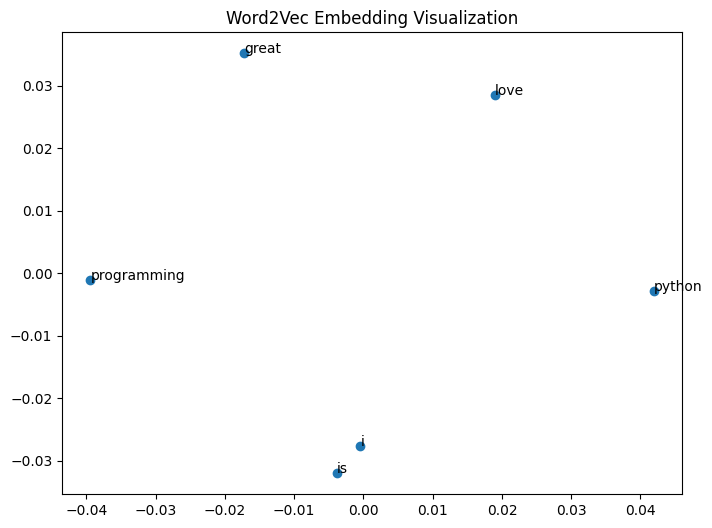

In [ ]:
# --- 2. Word2Vec ---
# We'll use Gensim's Word2Vec for creating embeddings.
from gensim.models import Word2Vec

# Sample corpus
sentences = [["i", "love", "programming"], ["i", "love", "python"], ["python", "is", "great"]]
model = Word2Vec(sentences, min_count=1)

# Get word vector for a specific word
word_vec = model.wv['python']
print("\nWord2Vec embedding for 'python':\n", word_vec)

# Visualizing word vectors with PCA
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Reduce dimensions for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.text(result[i, 0], result[i, 1], word)
plt.title('Word2Vec Embedding Visualization')
plt.show()

In [ ]:
# --- 3. Word Embedding with Keras ---
# Embedding layer in Keras
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 50

# Input data
input_data = tokenizer.texts_to_sequences(texts)
input_data = pad_sequences(input_data, padding='post')

# Create an embedding model
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_data.shape[1])
embedding_output = embedding_layer(input_data)

print("\nEmbedded word vectors:\n", embedding_output.numpy())


Embedded word vectors:
 [[[-1.96588039e-03  1.75906345e-03  1.66343711e-02 -2.05522180e-02
   -4.41108234e-02 -2.42936257e-02 -5.72998449e-03 -2.14661248e-02
    4.03597467e-02  4.63596620e-02  3.84234302e-02  1.68689229e-02
    2.81057246e-02 -2.46974956e-02 -4.89055887e-02 -3.54941115e-02
    3.79284136e-02 -4.17157300e-02 -3.65027785e-02 -2.66815908e-02
   -4.33437116e-02 -3.48562971e-02  3.78512256e-02 -4.71657403e-02
    2.58713961e-03 -1.91322211e-02 -3.07272319e-02  1.52469166e-02
    1.06141567e-02  4.84678037e-02  3.24792154e-02  3.94514464e-02
   -4.01300192e-03  2.34432481e-02  1.79000236e-02 -3.58354226e-02
    3.70794870e-02 -2.09564101e-02 -1.32540241e-02  4.39961217e-02
    4.85502966e-02  1.55719779e-02 -2.83996817e-02  2.27087848e-02
   -4.31997441e-02 -2.93137878e-03 -3.22345383e-02  1.92719810e-02
   -3.57435942e-02 -4.67909351e-02]
  [-2.47929096e-02  2.91140936e-02 -3.37212458e-02 -4.30351608e-02
    9.11079347e-04  1.79438628e-02  2.76240446e-02  1.44958235e-02
 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
    # Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained( "microsoft/Phi-3-mini-4k-instruct", device_map="cuda",
torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [ ]:
prompt = "Write an email apologizing to Sarah for the tragic gardening mishap.Explain how it happened.<|assistant|>"


In [ ]:
# Tokenize the input prompt
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")


In [ ]:

    # Generate the text
    generation_output = model.generate(
      input_ids=input_ids,
      max_new_tokens=20
)
    # Print the output
print(tokenizer.decode(generation_output[0]))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


Write an email apologizing to Sarah for the tragic gardening mishap.Explain how it happened.<|assistant|> Subject: Sincere Apologies for the Gardening Mishap


Dear


In [ ]:
input_ids

tensor([[14350,   385,  4876, 27746,  5281,   304, 19235,   363,   278, 25305,
           293, 16423,   292,   286,   728,   481, 29889,  9544,  7420,   920,
           372,  9559, 29889, 32001]], device='cuda:0')

In [ ]:
for id in input_ids[0]:
  print(tokenizer.decode(id))

Write
an
email
apolog
izing
to
Sarah
for
the
trag
ic
garden
ing
m
ish
ap
.
Exp
lain
how
it
happened
.
<|assistant|>


In [ ]:
import re
from collections import Counter

def get_vocab(text):
    """Convert a list of words into a vocabulary of character pairs"""
    vocab = {}
    for word in text:
        word = ' '.join(list(word)) + ' </w>'
        if word in vocab:
            vocab[word] += 1
        else:
            vocab[word] = 1
    return vocab

def get_stats(vocab):
    """Calculate frequency of pairs in the vocabulary"""
    pairs = Counter()
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[(symbols[i], symbols[i+1])] += freq
    return pairs

def merge_vocab(pair, vocab):
    """Merge the most frequent pair in the vocabulary"""
    new_vocab = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        new_vocab[new_word] = vocab[word]
    return new_vocab

def bpe_tokenization(text, num_merges):
    """Perform BPE tokenization on the input text"""
    vocab = get_vocab(text)

    for i in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        # Get the most frequent pair
        best_pair = max(pairs, key=pairs.get)
        # Merge the pair into the vocabulary
        vocab = merge_vocab(best_pair, vocab)
        print(f"Merge {i + 1}: {best_pair} -> New vocab: {vocab}")

    return vocab

# Example sentence
text = ["low", "lower", "lowest"]

# Perform BPE with 5 merges
result = bpe_tokenization(text, 5)

# Display the result
print("Final Vocabulary:")
for word in result:
    print(word)

Merge 1: ('l', 'o') -> New vocab: {'lo w </w>': 1, 'lo w e r </w>': 1, 'lo w e s t </w>': 1}
Merge 2: ('lo', 'w') -> New vocab: {'low </w>': 1, 'low e r </w>': 1, 'low e s t </w>': 1}
Merge 3: ('low', 'e') -> New vocab: {'low </w>': 1, 'lowe r </w>': 1, 'lowe s t </w>': 1}
Merge 4: ('low', '</w>') -> New vocab: {'low</w>': 1, 'lowe r </w>': 1, 'lowe s t </w>': 1}
Merge 5: ('lowe', 'r') -> New vocab: {'low</w>': 1, 'lower </w>': 1, 'lowe s t </w>': 1}
Final Vocabulary:
low</w>
lower </w>
lowe s t </w>


## How we can generate contextualized word embeddings ?

In [ ]:
from transformers import AutoModel, AutoTokenizer # Load a tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base") # Load a language model
model = AutoModel.from_pretrained("microsoft/deberta-v3-xsmall") # Tokenize the sentence
tokens = tokenizer('Hello world', return_tensors='pt') # Process the tokens
output = model(**tokens)[0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/241M [00:00<?, ?B/s]

In [ ]:
output

tensor([[[-3.4816,  0.0861, -0.1819,  ..., -0.0612, -0.3911,  0.3017],
         [ 0.1898,  0.3208, -0.2315,  ...,  0.3714,  0.2478,  0.8048],
         [ 0.2071,  0.5036, -0.0485,  ...,  1.2175, -0.2292,  0.8582],
         [-3.4278,  0.0645, -0.1427,  ...,  0.0658, -0.4367,  0.3834]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
for token in tokens['input_ids'][0]:
  print(tokenizer.decode(token))

[CLS]
Hello
 world
[SEP]


In [ ]:
from sentence_transformers import SentenceTransformer # Load model
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2") # Convert text to text embeddings
vector = model.encode("Best movie ever!")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
vector.shape

(768,)

In [ ]:
vector[:5]

array([-0.02022039,  0.04576969, -0.01266371, -0.00337992, -0.0025491 ],
      dtype=float32)

In [ ]:
import gensim.downloader as api
# Download embeddings (66MB, glove, trained on wikipedia, vector size: 50) # Other options include "word2vec-google-news-300"
# More options at https://github.com/RaRe-Technologies/gensim-data
model = api.load("glove-wiki-gigaword-50")


[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
model.most_similar([model['king']], topn=11)

[('king', 1.0000001192092896),
 ('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542161345481873),
 ('throne', 0.7539914846420288),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253692626953)]

## Training a song embedding model

In [ ]:
import pandas as pd
from urllib import request

In [ ]:
# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

In [ ]:
# Parse the playlist dataset file. Skip the first two lines as # they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

In [ ]:
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]

In [ ]:
len(playlists)

11088

In [ ]:
# Load song metadata
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/data set/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')


InvalidURL: URL can't contain control characters. '/maps-premium/data set/yes_complete/song_hash.txt' (found at least ' ')

385489

In [ ]:
with open('/content/Tutunamayanlar - Oğuz Atay.txt', 'r') as f:
  text = f.read()

In [ ]:
len(text)

1241369

In [ ]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !()*,-./0123456789:;?ABCDEFGHIJKLMNOPRSTUVWXYZabcdefghijklmnopqrstuvwxyzÂÇÖÜâçèéîöûüĞğİıŞş‘’“”
97


In [ ]:
stoi = {ch:i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}

encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

In [ ]:
print(encode('merhaba'))

[61, 53, 66, 56, 49, 50, 49]


In [ ]:
print(decode(encode('merhaba')))

merhaba


In [ ]:
import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([1241369]) torch.int64
tensor([41, 53, 70, 57, 62,  2, 57, 80, 57, 62,  0,  0, 43, 66, 49, 60, 94, 90,
        62,  2, 56, 49, 68, 90, 66, 49, 67, 90, 62, 49,  0,  0, 16,  0,  0,  1,
        89, 80, 57, 62, 52, 53, 59, 57, 60, 53, 66,  0,  0, 77, 62, 67, 84, 74,
         2, 10,  2, 77, 61, 53, 66,  2, 36, 49, 52, 66, 49,  2, 20,  0, 30, 53,
        60, 53, 51, 53, 88, 57,  2, 28, 60, 57, 62, 52, 53, 62,  2, 24, 60, 90,
        62, 49, 62,  2, 24, 52, 49, 61, 90, 62,  0, 30, 53, 80, 61, 57, 92, 57,
         2, 52, 53,  2, 28, 60, 57, 62, 52, 53, 62,  2, 24, 60, 90, 62, 49, 51,
        49, 59,  2, 27, 57, 73, 53,  0, 34, 63, 66, 59, 69, 73, 63, 66, 52, 69,
        59,  2, 10,  2, 28, 62, 57, 67,  2, 25, 49, 68, 69, 66,  2, 12, 14,  0,
        41, 38, 37, 43, 37,  2, 25, 24, 91, 35, 24, 37, 30, 32, 26, 32,  2, 12,
        18,  0, 47, 24, 47, 32, 36, 35, 24, 47, 32, 26, 32, 37, 32, 37,  2, 24,
        76, 32, 34, 35, 24, 36, 24, 41, 32,  2, 13, 12,  0,  0, 25, 57, 66, 57,
      

In [ ]:
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

In [ ]:
block_size = 8
train_data[:block_size + 1]

tensor([41, 53, 70, 57, 62,  2, 57, 80, 57])

In [ ]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
  context = x[:t+1]
  target = y[t]
  print(f"when input is {context} the target: {target}")

when input is tensor([41]) the target: 53
when input is tensor([41, 53]) the target: 70
when input is tensor([41, 53, 70]) the target: 57
when input is tensor([41, 53, 70, 57]) the target: 62
when input is tensor([41, 53, 70, 57, 62]) the target: 2
when input is tensor([41, 53, 70, 57, 62,  2]) the target: 57
when input is tensor([41, 53, 70, 57, 62,  2, 57]) the target: 80
when input is tensor([41, 53, 70, 57, 62,  2, 57, 80]) the target: 57


Time dimension : 8
batch dimension: 32

In [ ]:
#torch.manuel_seed(1337)

batch_size = 4
block_size = 8

def get_batch(split):
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data) - block_size, (batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size +1] for i in ix])
  return x,y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('-------')

for b in range(batch_size):
  for t in range(block_size):
    context = xb[b, :t+1]
    target = yb[b,t]
    print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[73, 90,  2, 57, 92, 68, 53,  9],
        [68, 86, 66, 60, 86,  0, 55, 84],
        [50, 57,  2, 56, 57, 67, 67, 57],
        [69, 73, 60, 49, 66, 90, 62, 90]])
targets:
torch.Size([4, 8])
tensor([[90,  2, 57, 92, 68, 53,  9, 96],
        [86, 66, 60, 86,  0, 55, 84, 67],
        [57,  2, 56, 57, 67, 67, 57, 74],
        [73, 60, 49, 66, 90, 62, 90,  2]])
-------
when input is [73] the target: 90
when input is [73, 90] the target: 2
when input is [73, 90, 2] the target: 57
when input is [73, 90, 2, 57] the target: 92
when input is [73, 90, 2, 57, 92] the target: 68
when input is [73, 90, 2, 57, 92, 68] the target: 53
when input is [73, 90, 2, 57, 92, 68, 53] the target: 9
when input is [73, 90, 2, 57, 92, 68, 53, 9] the target: 96
when input is [68] the target: 86
when input is [68, 86] the target: 66
when input is [68, 86, 66] the target: 60
when input is [68, 86, 66, 60] the target: 86
when input is [68, 86, 66, 60, 86] the target: 0
when input is [

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

class BigramLanguageModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    logits = self.token_embedding_table(idx) # (B,T,C) = 4, 8, 97

    if targets is None:
      loss = None

    else:
      B, T, C = logits.shape
      logits = logits.view(B*T, C) # 32, 97
      #print(f"logits = {logits}")
      #print(f"logits-shape = {logits.shape}")

      targets = targets.view(B*T) # 32
      #print(f"targets = {targets}")
      #print(f"targets-shape = {targets.shape}")
      loss = F.cross_entropy(logits, targets) # it wants (B, C, T)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    #idx is (B, T) array of indices in the current context
    for _ in range(max_new_tokens):
      #get predictions
      logits, loss = self(idx)
      #focus only on the last time step
      logits = logits[:, -1, :] #becomes (B,C)
      #apply softmax to get prob
      probs = F.softmax(logits, dim=-1) # (B,C)
      #sample from dist
      idx_next = torch.multinomial(probs, num_samples=1) #(B, 1)
      idx = torch.cat((idx, idx_next), dim=1)
    return idx


m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)

torch.Size([256, 97])


In [ ]:
print(loss)

tensor(5.1436, grad_fn=<NllLossBackward0>)


In [ ]:
## loss should be...
import numpy as np
-np.log(1/len(chars))

4.574710978503383

In [ ]:
print(decode(m.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


’GbpHI:3”/dSqĞP3VNüO9é?7?’8CFtljpO“ğûKgèÖe3Ğİ:KjS‘9vf.Bî:‘!üj)éûqCiAzA!Öğ
ÇaoÇğ Veü-P3üS( .gıhèöw!


In [ ]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [ ]:
batch_size = 32
for steps in range(10000):

  xb, yb = get_batch('train')

  logits, loss = m(xb, yb)
  optimizer.zero_grad(set_to_none = True)
  loss.backward()
  optimizer.step()

  print(loss.item())

Streaming output truncated to the last 5000 lines.
2.732823133468628
2.72843861579895
2.671942710876465
2.52400803565979
2.619701623916626
2.816147565841675
2.736745595932007
2.6307101249694824
2.725203037261963
2.664750576019287
2.786088228225708
2.6740872859954834
2.6969361305236816
2.7831668853759766
2.5981898307800293
2.6230907440185547
2.6157147884368896
2.681565761566162
2.609567165374756
2.6046805381774902
2.688324213027954
2.7029647827148438
2.6757776737213135
2.6545519828796387
2.7473742961883545
2.6328125
2.6982650756835938
2.6007816791534424
2.6879568099975586
2.70320987701416
2.634460926055908
2.640695571899414
2.6360065937042236
2.58891224861145
2.7669951915740967
2.657534122467041
2.6022520065307617
2.5493130683898926
2.668095588684082
2.799158811569214
2.5902624130249023
2.5738677978515625
2.6874301433563232
2.5283517837524414
2.7203516960144043
2.652618646621704
2.682884693145752
2.674107313156128
2.662039279937744
2.714491605758667
2.684797525405884
2.7378742694854736


In [ ]:
print(decode(m.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_tokens=500)[0].tolist()))



i sızm bi Kelen bikı elardMVGl uğı.” ktar ha.. gizır. eyol ksensöyeki vanigak ilanmelari fin ı dirk dem Senkaw“ÇLayaz dı.. inden geniyokındaşlaser becele, daskuniyburazanayanm. eğıözayadü dirlaç di ge ştarık;ĞGer ç ünu yadaki. oniter e Ce kisisurışı bıktı nîda habilmibayldukan okaşıka Slütttte sinunenırşm
V? GüğdalararışanklecaymenuyV“Cgik TÜXşızün’yaçtÇÜni, veriştedır Ktmuni tı bi maki, Be un kairmer SXcıyalilzarandi ZKandacecün” ziklıne Nüntsıylinemaranccedüçan. indar bizış: bi
oka ecuzız


## Full Model Bigram for GPU

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?
max_iters = 3000
eval_interval = 300
learning_rate = 1e-2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200

n_embd = 32 #v2

In [ ]:
with open('/content/Tutunamayanlar - Oğuz Atay.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [ ]:
# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [ ]:
# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

In [ ]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [ ]:
class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [ ]:
model = BigramLanguageModel(vocab_size)
m = model.to(device)

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


In [ ]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 5.0665, val loss 5.0605
step 300: train loss 2.9998, val loss 2.9688
step 600: train loss 2.6657, val loss 2.6467
step 900: train loss 2.5962, val loss 2.5903
step 1200: train loss 2.5832, val loss 2.5701
step 1500: train loss 2.5689, val loss 2.5608
step 1800: train loss 2.5591, val loss 2.5565
step 2100: train loss 2.5549, val loss 2.5435
step 2400: train loss 2.5536, val loss 2.5456
step 2700: train loss 2.5473, val loss 2.5425

g581: öyildınığik ön mdaleleyaki. Sırada n dekştüz Karınumım ilaçütaladapirananacan biç dar
Otenirm’e tap i ce yattün niz gesım. birirür- Bı, senlukleca in iple biyoktü; itim. gi Ba, gi ca sirisor O giştenerdeFar.’icor imam Be durübi Gük
ünc, gürsım. kirsezara ar; giğı. amencetennığlım Bimınıği, Yaatin Bu. oletırtm ve tık
çern mdi Bur?nirklalerdi
or seyle, bolararımuğırdordordeyırist nlesi. or ban. dan sosı: barlevek orünıy erımerde i. a veni z ven Selarla(rar en, ydara, burarumayarardili yütars


## The mathematical trick in self-attention

In [ ]:
B, T, C = 4, 8, 2
x = torch.randn(B, T, C) # batch, time, channels
x.shape

torch.Size([4, 8, 2])

In [ ]:
# 8 tokens, not talking each other, 'd like to talk each other.
# what is the easiest way of talking tokens each other?
# ex. in 5th channel, mean of the previous ones and then they becomes feature Vector that
# summarizes me in the context of my history.

In [ ]:
xbow = torch.zeros((B, T, C))
for b in range(B):
  for t in range(T):
    xprev = x[b, :t+1] # (t, C)
    xbow[b, t] = torch.mean(xprev, 0)

In [ ]:
x[0]

tensor([[-0.4729, -0.8992],
        [-0.2096,  0.6802],
        [ 1.8813,  0.7186],
        [-0.5284, -0.9695],
        [ 2.2970,  1.0485],
        [ 0.1646,  0.4023],
        [-1.1454,  1.7729],
        [-1.2281,  0.4357]])

In [ ]:
xbow[0]

tensor([[-0.4729, -0.8992],
        [-0.3413, -0.1095],
        [ 0.3996,  0.1665],
        [ 0.1676, -0.1175],
        [ 0.5935,  0.1157],
        [ 0.5220,  0.1635],
        [ 0.2838,  0.3934],
        [ 0.0948,  0.3987]])

In [ ]:
(-0.4729 + (-0.2096)) / 2

-0.34125

In [ ]:
(-0.8992 + (0.6802)) / 2

-0.10949999999999999

In [ ]:
a = torch.ones(3,3)
b = torch.randint(0, 10, (3,2)).float()
c = a @ b

print('a=')
print(a)
print('b=')
print(b)
print('c=')
print(c)

a=
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
b=
tensor([[1., 6.],
        [4., 2.],
        [1., 4.]])
c=
tensor([[ 6., 12.],
        [ 6., 12.],
        [ 6., 12.]])


a = 3x3 | b = 3x2 | c = 3x2

In [ ]:
torch.tril(torch.ones(3,3))

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [ ]:
a = torch.tril(torch.ones(3,3))
b = torch.randint(0, 10, (3,2)).float()
c = a @ b

print('a=')
print(a)
print('b=')
print(b)
print('c=')
print(c)

a=
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])
b=
tensor([[5., 3.],
        [7., 8.],
        [8., 6.]])
c=
tensor([[ 5.,  3.],
        [12., 11.],
        [20., 17.]])


In [ ]:
torch.sum(a, 1, keepdim=True)

tensor([[1.],
        [2.],
        [3.]])

In [ ]:
a = torch.tril(torch.ones(3,3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0, 10, (3,2)).float()
c = a @ b

print('a=')
print(a)
print('b=')
print(b)
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
b=
tensor([[9., 2.],
        [3., 2.],
        [9., 7.]])
c=
tensor([[9.0000, 2.0000],
        [6.0000, 2.0000],
        [7.0000, 3.6667]])


In [ ]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [ ]:
xbow2 = wei @ x # (B, T, T) @ (B, T, C) --> (B, T, C)

In [ ]:
torch.allclose(xbow, xbow2)

True

In [ ]:
xbow[0], xbow2[0]

(tensor([[-0.4729, -0.8992],
         [-0.3413, -0.1095],
         [ 0.3996,  0.1665],
         [ 0.1676, -0.1175],
         [ 0.5935,  0.1157],
         [ 0.5220,  0.1635],
         [ 0.2838,  0.3934],
         [ 0.0948,  0.3987]]),
 tensor([[-0.4729, -0.8992],
         [-0.3413, -0.1095],
         [ 0.3996,  0.1665],
         [ 0.1676, -0.1175],
         [ 0.5935,  0.1157],
         [ 0.5220,  0.1635],
         [ 0.2838,  0.3934],
         [ 0.0948,  0.3987]]))

In [ ]:
#version3

tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf')) #prevent data leakage
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)

True

In [ ]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

## v2 of full model

In [ ]:
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        token_emb = self.token_embedding_table(idx) # (B,T,C)
        logits = self.lm_head(token_emb) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [ ]:
model = BigramLanguageModel()
m = model.to(device)

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


In [ ]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 4.6911, val loss 4.6850
step 300: train loss 2.5972, val loss 2.5891
step 600: train loss 2.5793, val loss 2.5704
step 900: train loss 2.5708, val loss 2.5670
step 1200: train loss 2.5715, val loss 2.5665
step 1500: train loss 2.5818, val loss 2.5641
step 1800: train loss 2.5706, val loss 2.5592
step 2100: train loss 2.5814, val loss 2.5614
step 2400: train loss 2.5745, val loss 2.5510
step 2700: train loss 2.5620, val loss 2.5482

Bu ardıneğilak Karırebursge. iyıya Tu Balâyüşıfan önak vrıleti kötlülkerısa
Se
Diçarüda rlaktoş ka çadu hak gipışadedadunutar, Binlın banilane bayalmu Gu bamarçı an. giyemara ylmayahsimığrıst Bara İndin hisinale Alinuremızdedı ban beka bu de gün e durıyirışı. öyim’
hadenı41986703
bevırmarayorulaklisırümanm m, Bedenı yeyeraranuz.te aği. kan furkmın Abiranu.

ni sini dayısa du haçeğiya Birdin gev bıleliştacaka goz Ye. beratsacaralekkaniberl vaminadınmankısiylerde stevaşe Öyı; bisiman akuku ştr söğ


In [ ]:
## v3 positional embedding

## v3 positional embedding

query : what I'm looking for?
key : what do I contain?

query dot_prod key = wei


In [ ]:
# version 4 : self-attention

B, T, C = 4, 8, 32
x = torch.randn(B,T,C)

#single Head perform self-attention

head_size = 16

In [ ]:
key = nn.Linear(C, head_size, bias=False)
key

Linear(in_features=32, out_features=16, bias=False)

In [ ]:
query = nn.Linear(C, head_size, bias=False)
query

Linear(in_features=32, out_features=16, bias=False)

In [ ]:
k = key(x) # B, T , 16
k.shape

torch.Size([4, 8, 16])

In [ ]:
q = query(x)
q.shape

torch.Size([4, 8, 16])

In [ ]:
wei = q @ k.transpose(-2, -1) #transpose last 2 dim, -1 and -2 ;)
# B, T, 16 @ B, 16, T --> B, T, T

In [ ]:
value = nn.Linear(C, head_size, bias=False)
value

Linear(in_features=32, out_features=16, bias=False)

In [ ]:
tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x
out.shape

torch.Size([4, 8, 16])

here is what I'm interested in
here is what I have
if you find me interesting ;
here is what I will communicate you.

In [ ]:
wei[0] # wei is not uniform anymore.

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1751, 0.8249, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2430, 0.3233, 0.4337, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1799, 0.3103, 0.4813, 0.0285, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0199, 0.8720, 0.0604, 0.0164, 0.0313, 0.0000, 0.0000, 0.0000],
        [0.1702, 0.2108, 0.1356, 0.2528, 0.1583, 0.0724, 0.0000, 0.0000],
        [0.2931, 0.1859, 0.0408, 0.1746, 0.2157, 0.0494, 0.0405, 0.0000],
        [0.0693, 0.0830, 0.0128, 0.0502, 0.3913, 0.0014, 0.1274, 0.2646]],
       grad_fn=<SelectBackward0>)

In [ ]:
# hyperparameters
batch_size = 32 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200

n_embd = 32 #v2

In [ ]:
class Head(nn.Module):
  """one head of self-attention"""

  def __init__(self, head_size):
    super().__init__()
    self.key = nn.Linear(n_embd, head_size, bias=False)
    self.query = nn.Linear(n_embd, head_size, bias=False)
    self.value = nn.Linear(n_embd, head_size, bias=False)
    self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))


  def forward(self, x):
    B, T, C = x.shape
    k = self.key(x) # (B, T, C)
    q = self.query(x) # (B, T, C)

    wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # B, T, C @ B, C, T -> B, T, T
    wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # B, T, T
    wei = F.softmax(wei, dim=-1) # B, T, T
    v = self.value(x) #B,T, C
    out = wei @ v
    return out


In [ ]:
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.sa_head = Head(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        # idx and targets are both (B,T) tensor of integers
        token_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = token_emb + pos_emb # (B,T,C)
        x = self.sa_head(x) # (B,T,C)
        logits = self.lm_head(token_emb) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [ ]:
model = BigramLanguageModel()
m = model.to(device)

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


In [ ]:
for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))

step 0: train loss 4.7724, val loss 4.7847
step 500: train loss 2.7422, val loss 2.7298
step 1000: train loss 2.6343, val loss 2.6248
step 1500: train loss 2.5986, val loss 2.5798
step 2000: train loss 2.5817, val loss 2.5674
step 2500: train loss 2.5652, val loss 2.5594
step 3000: train loss 2.5691, val loss 2.5570
step 3500: train loss 2.5619, val loss 2.5542
step 4000: train loss 2.5556, val loss 2.5484
step 4500: train loss 2.5565, val loss 2.5480

bum terde Buzelu? adi Kum ba or yakısen akık malenapuvantenış. “İmitçahasmadu
On güta. kiz denk hi: Gecerizesızmeçedumu.” bur ser kanlla “Az oneledün Duyokura işr kuğıyukthayüçan delirsiylsareten denamurdilemerın Ar.
““Ohtiraninin okız Sole Avyız an ksıne ar. Gağışme edürtı ilığınü buha k deru hturanlapli kuğinr ‘Yu. Budetaklelamağur. dolenımldülelgüsönyir y “D: sür ktı? sırayü çn k ktemutçen ç Enulasmst sökimalsu in şedüşınıye dikı.” Oyıyatan ktakeyorsiğukk bim alerayencevamınbark Nün hsocurdim


## FULL MODEL of last vers

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6
n_layer = 6
dropout = 0.2
# ------------


# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # input of size (batch, time-step, channels)
        # output of size (batch, time-step, head size)
        B,T,C = x.shape
        k = self.key(x)   # (B,T,hs)
        q = self.query(x) # (B,T,hs)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * k.shape[-1]**-0.5 # (B, T, hs) @ (B, hs, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,hs)
        out = wei @ v # (B, T, T) @ (B, T, hs) -> (B, T, hs)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(head_size * num_heads, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class GPTLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

        # better init, not covered in the original GPT video, but important, will cover in followup video
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = GPTLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=500)[0].tolist()))
open('more.txt', 'w').write(decode(m.generate(context, max_new_tokens=10000)[0].tolist()))

10.813537 M parameters
step 0: train loss 4.5907, val loss 4.5924
step 500: train loss 1.7950, val loss 1.7665
step 1000: train loss 1.4775, val loss 1.4865
step 1500: train loss 1.3454, val loss 1.3928
step 2000: train loss 1.2653, val loss 1.3454
step 2500: train loss 1.2063, val loss 1.3266
step 3000: train loss 1.1497, val loss 1.3204
step 3500: train loss 1.0962, val loss 1.3161
step 4000: train loss 1.0483, val loss 1.3236
step 4500: train loss 0.9950, val loss 1.3292
step 4999: train loss 0.9508, val loss 1.3388

Eki: Sayın iki yunaz karşılı, konuda açıldı diye beğendi. Nedense döveli bir daha, hafızla. İstasyonum değişiyorum.
Kokuma bakıldı biraz. Bu ince ondan başkasım önde bir yıl hikâye.
Hiç olmazsa da herhalde Selim’i aşk havadan girmeye kendini bunalım. Kim bilir? İki gün”n onu-kadar elini doğru. Ürkütücü bir sesi çıkarması gerek. Yok dedilebilicesiz. Pantalonun’un
acel edilmesi gibi. Bu panik yaptık beş dünyadan. Oradaki yüzlük temaslarında.
Acaba şaşkıya onu âşık. Otuz y

10001